Pranav Mandava
21BAI1061

In [1]:
import cv2
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops
import numpy as np

In [2]:
img = cv2.imread('/content/drive/MyDrive/machine-vision/nature-218481_640.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

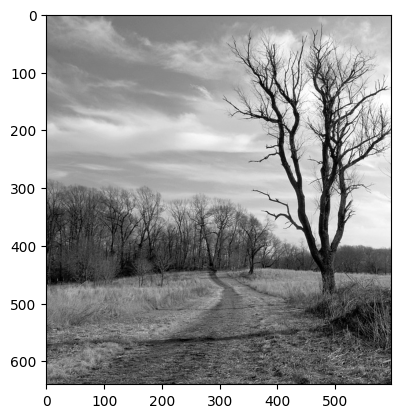

In [3]:
plt.imshow(img, cmap='gray')

In [4]:
# img.shape

locs = [(100, 100), (200, 200), (150, 150), (500, 400), (500, 300),(600,200),(500,100),(450,150)]

PATCH_SIZE = 15

patches = []

for loc in locs:
  patches.append(img[loc[0]:loc[0] + PATCH_SIZE,
                             loc[1]:loc[1] + PATCH_SIZE])

In [5]:
np.array(patches).shape

(8, 15, 15)

In [6]:
xs = []
ys = []
for patch in (patches):
    glcm = graycomatrix(patch, distances=[5], angles=[0], levels=256,
                        symmetric=True, normed=True)
    xs.append(graycoprops(glcm, 'dissimilarity')[0, 0])
    ys.append(graycoprops(glcm, 'correlation')[0, 0])

(-0.5, 596.5, 639.5, -0.5)

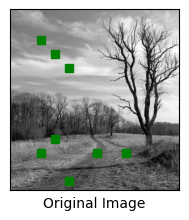

In [7]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(3, 2, 1)
ax.imshow(img, cmap=plt.cm.gray,
          vmin=0, vmax=255)
for (y, x) in locs:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'gs')
# for (y, x) in sky_locations:
#     ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'bs')
ax.set_xlabel('Original Image')
ax.set_xticks([])
ax.set_yticks([])
ax.axis('image')

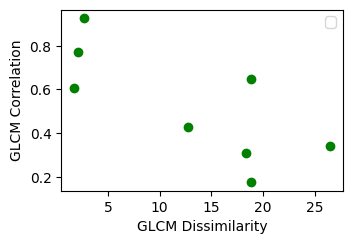

In [8]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(3, 2, 2)
ax.plot(xs[:len(locs)], ys[:len(locs)], 'go')
ax.set_xlabel('GLCM Dissimilarity')
ax.set_ylabel('GLCM Correlation')
ax.legend()

In [9]:
distances = [12]
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
glcm = graycomatrix(img, distances=distances, angles=angles, levels=256)


contrast = graycoprops(glcm, 'contrast')
dissimilarity = graycoprops(glcm, 'dissimilarity')
homogeneity = graycoprops(glcm, 'homogeneity')
energy = graycoprops(glcm, 'energy')
correlation = graycoprops(glcm, 'correlation')


print("Contrast:", contrast)
print("Dissimilarity:", dissimilarity)
print("Homogeneity:", homogeneity)
print("Energy:", energy)
print("Correlation:", correlation)

Contrast: [[2738.7547062  2514.72140079 2164.54678648 2653.89300144]]
Dissimilarity: [[29.44015491 30.19918979 29.78493049 31.34104146]]
Homogeneity: [[0.10115091 0.06978673 0.05891319 0.06880586]]
Energy: [[0.00984101 0.00831646 0.00757501 0.00794614]]
Correlation: [[0.632994   0.66566686 0.71437552 0.64731797]]


In [10]:
full_angles = [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi, 3*np.pi/4, 3*np.pi/2, 5*np.pi/4]


glcm = graycomatrix(img, distances=distances, angles=full_angles, levels=256)


contrast = graycoprops(glcm, 'contrast')
dissimilarity = graycoprops(glcm, 'dissimilarity')
homogeneity = graycoprops(glcm, 'homogeneity')
energy = graycoprops(glcm, 'energy')
correlation = graycoprops(glcm, 'correlation')


print("Contrast:", contrast)
print("Dissimilarity:", dissimilarity)
print("Homogeneity:", homogeneity)
print("Energy:", energy)
print("Correlation:", correlation)

Contrast: [[2738.7547062  2514.72140079 2164.54678648 2653.89300144 2738.7547062
  2653.89300144 2164.54678648 2514.72140079]]
Dissimilarity: [[29.44015491 30.19918979 29.78493049 31.34104146 29.44015491 31.34104146
  29.78493049 30.19918979]]
Homogeneity: [[0.10115091 0.06978673 0.05891319 0.06880586 0.10115091 0.06880586
  0.05891319 0.06978673]]
Energy: [[0.00984101 0.00831646 0.00757501 0.00794614 0.00984101 0.00794614
  0.00757501 0.00831646]]
Correlation: [[0.632994   0.66566686 0.71437552 0.64731797 0.632994   0.64731797
  0.71437552 0.66566686]]


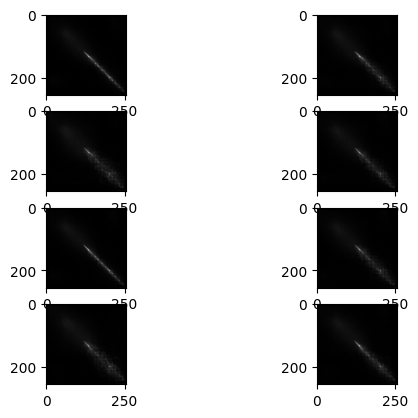

In [11]:

for i in range(8):
  # subplot_val = int(f"42{i + 1}")
  # print(subplot_val)
  plt.subplot(4,2, i + 1).imshow( glcm[:, :, 0, i], cmap='gray')

# plt.imshow()


In [12]:
np.unique( glcm[:, :, 0, i])

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 107, 109, 110, 112, 113, 114, 115, 117, 118, 119, 120, 121,
       123, 126, 129, 131, 133, 134, 135, 137, 140, 141, 142, 143, 145,
       147, 148, 149, 151, 154, 155, 156, 163, 168, 170, 176, 177, 187,
       191, 195, 199, 207, 216, 217, 222, 236, 239, 243, 260, 290],
      dtype=uint32)

In [13]:
glcm.shape

(256, 256, 1, 8)

In [14]:
from skimage.feature import local_binary_pattern

radius = 3
n_points = 8 * radius
lbp = local_binary_pattern(img, n_points, radius, method='default')

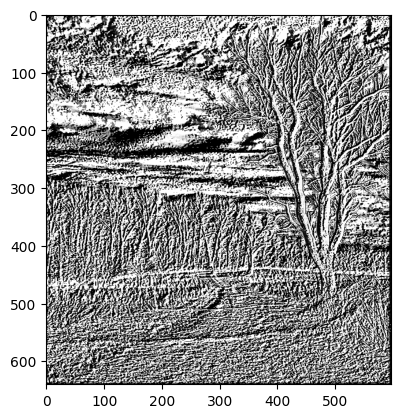

In [15]:
plt.imshow(lbp, cmap='gray')
plt.show()